<h1>ML_Pattern_Classification project | Main File</h1>


In [1]:
#import BirdsData from BirdExplore
from BirdExplore import BirdsData
import os
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from matplotlib import cm

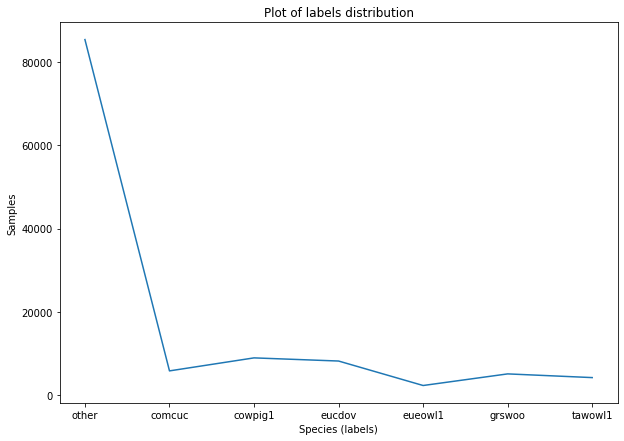

[85358, 5833, 8954, 8198, 2324, 5111, 4222]

In [2]:
BirdsData('ptichki').labels_distribution()

In [3]:
def get_sound_label(species, sample,project_folder):
    folder_path = os.path.join(project_folder, species)
    file_list = os.listdir(folder_path)
    for file in file_list:
        if file.endswith('.npy'):
            file_path = os.path.join(folder_path, sample)
            data = np.load(f'{file_path}.npy')
            label = np.load(f'{file_path}.labels.npy')
            return data

data = get_sound_label('comcuc','25627','ptichki')

In [4]:
united_data = BirdsData('ptichki').united_dataset()
print(united_data.shape)

(120000, 549)


In [8]:
# df = pd.DataFrame(united_data,columns=)
full_df = BirdsData('ptichki').get_dataframe()

<h4>Create correlation histogram between labels by choosing threshold to improve readability. Needs to be fixed</h4>

<AxesSubplot:>

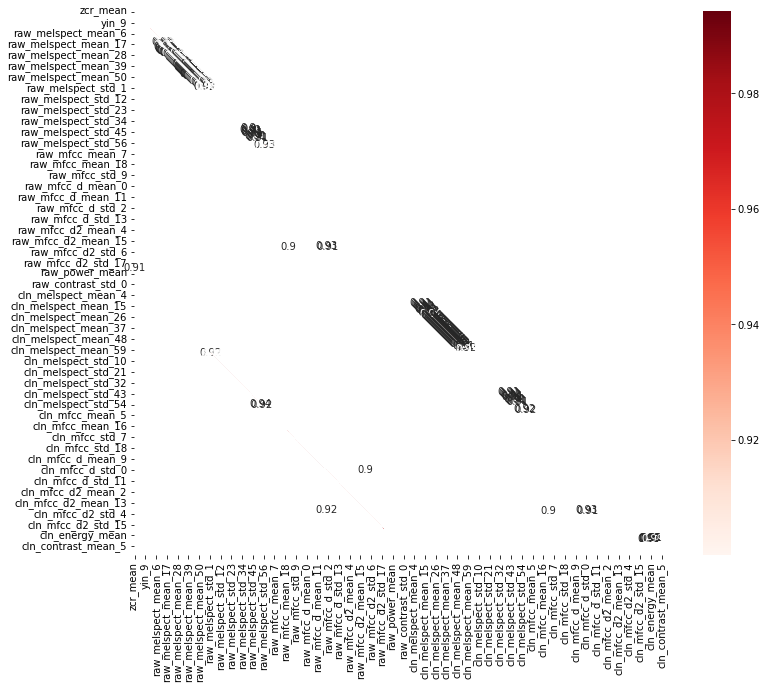

In [67]:
corr = full_df.corr()
threshold = 0.9
filtered_corr = corr[(corr >= threshold) & (corr != 1.000)]
f, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(filtered_corr, annot=True, mask = mask, cmap='Reds')

<h4>Plotting MFCC for each bird species</h4>

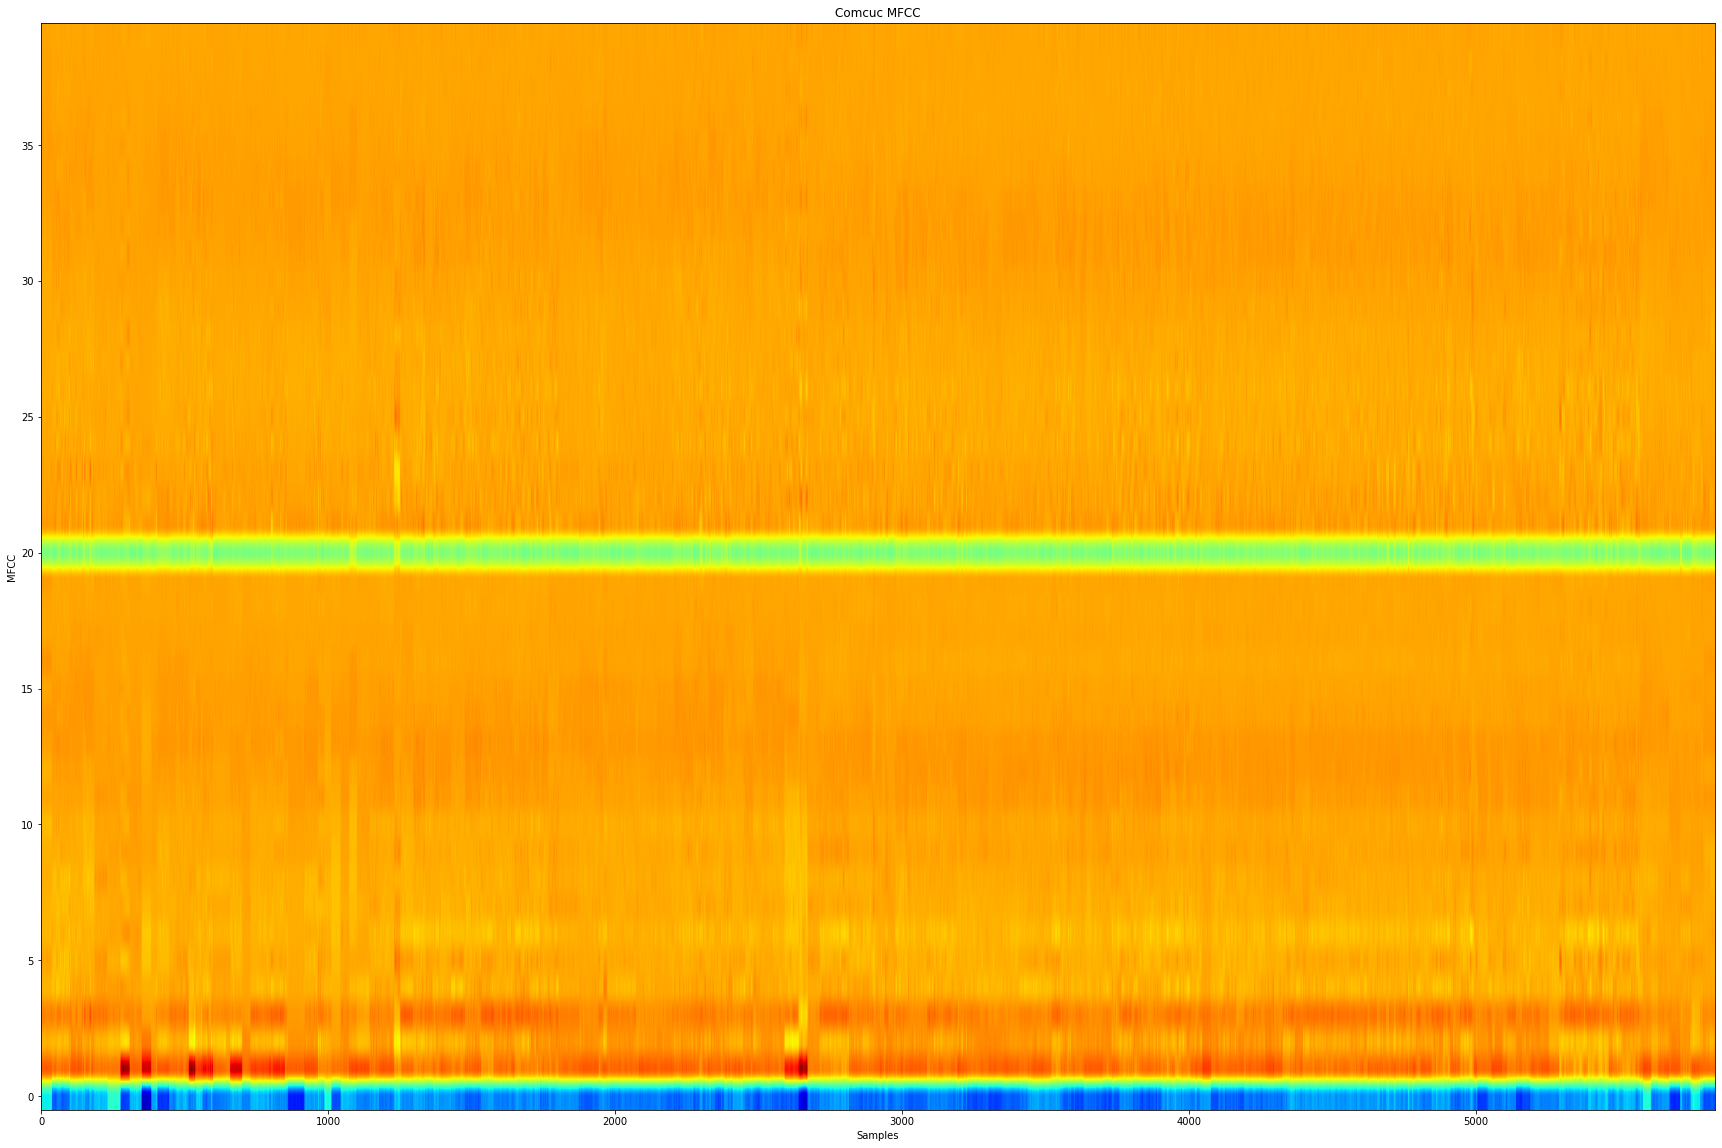

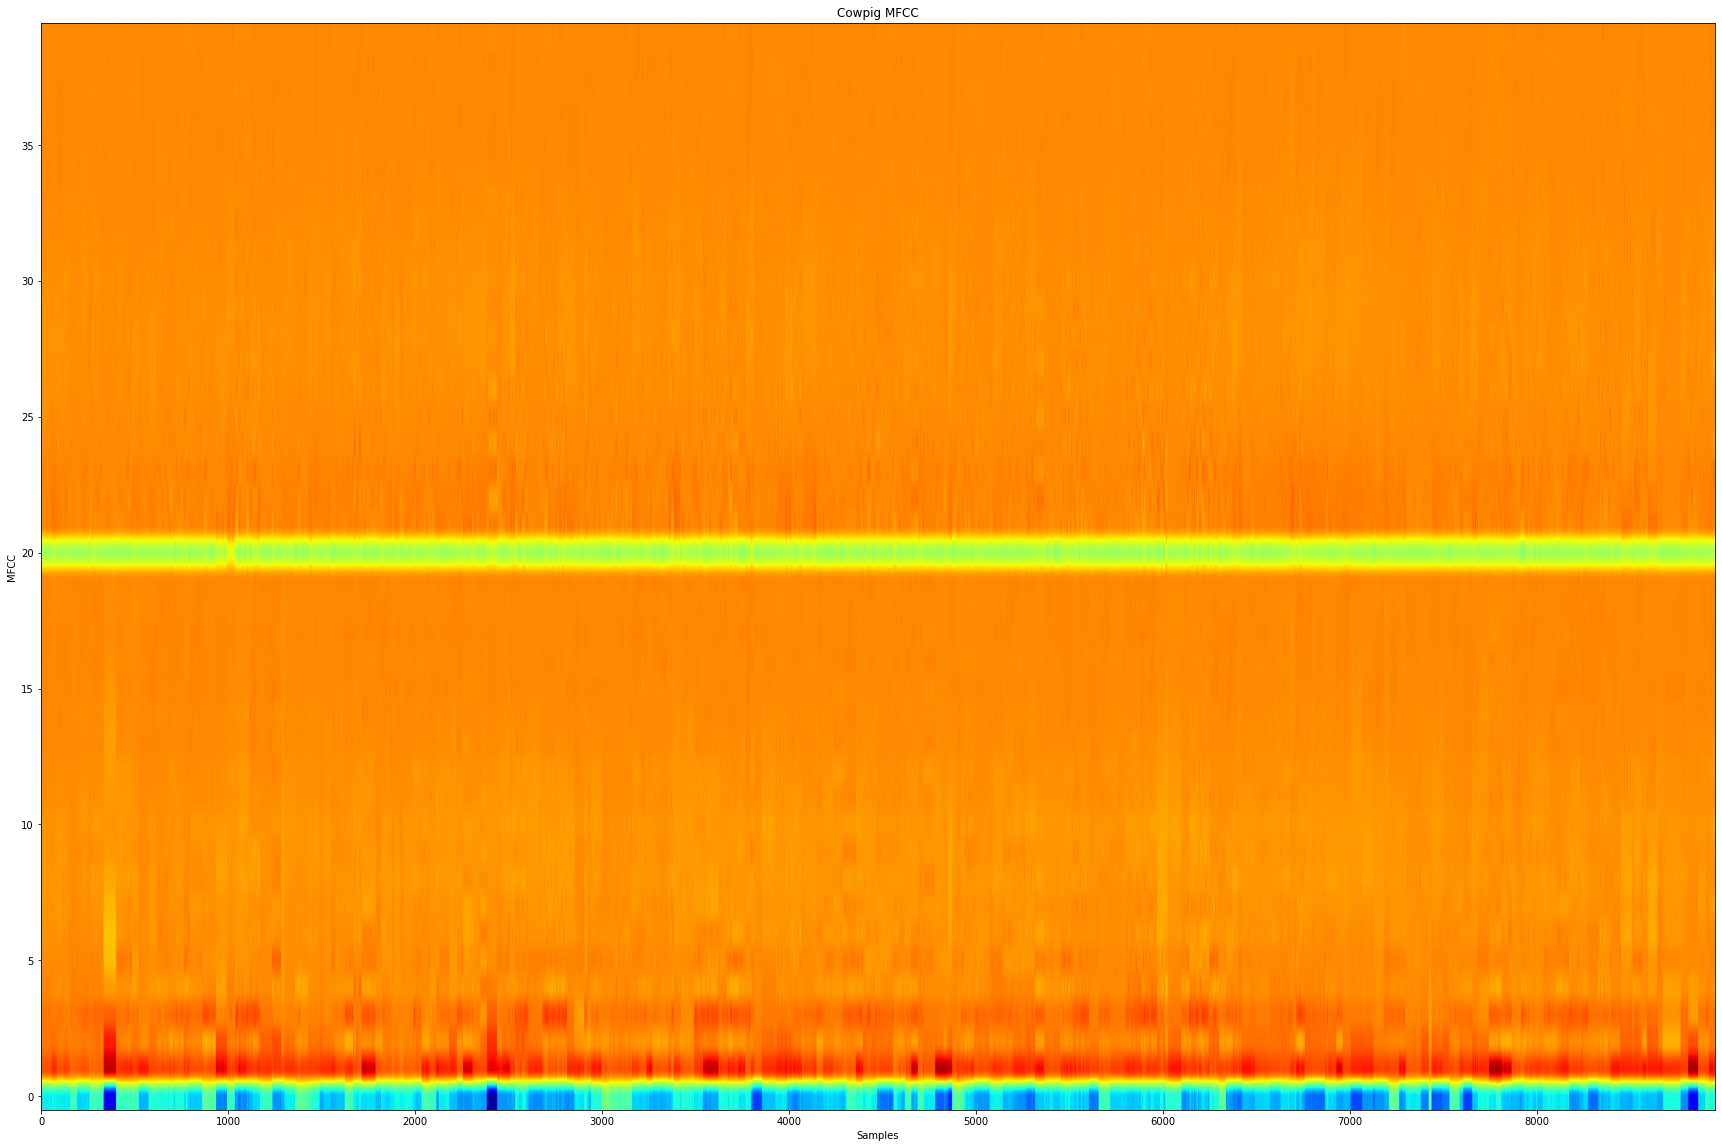

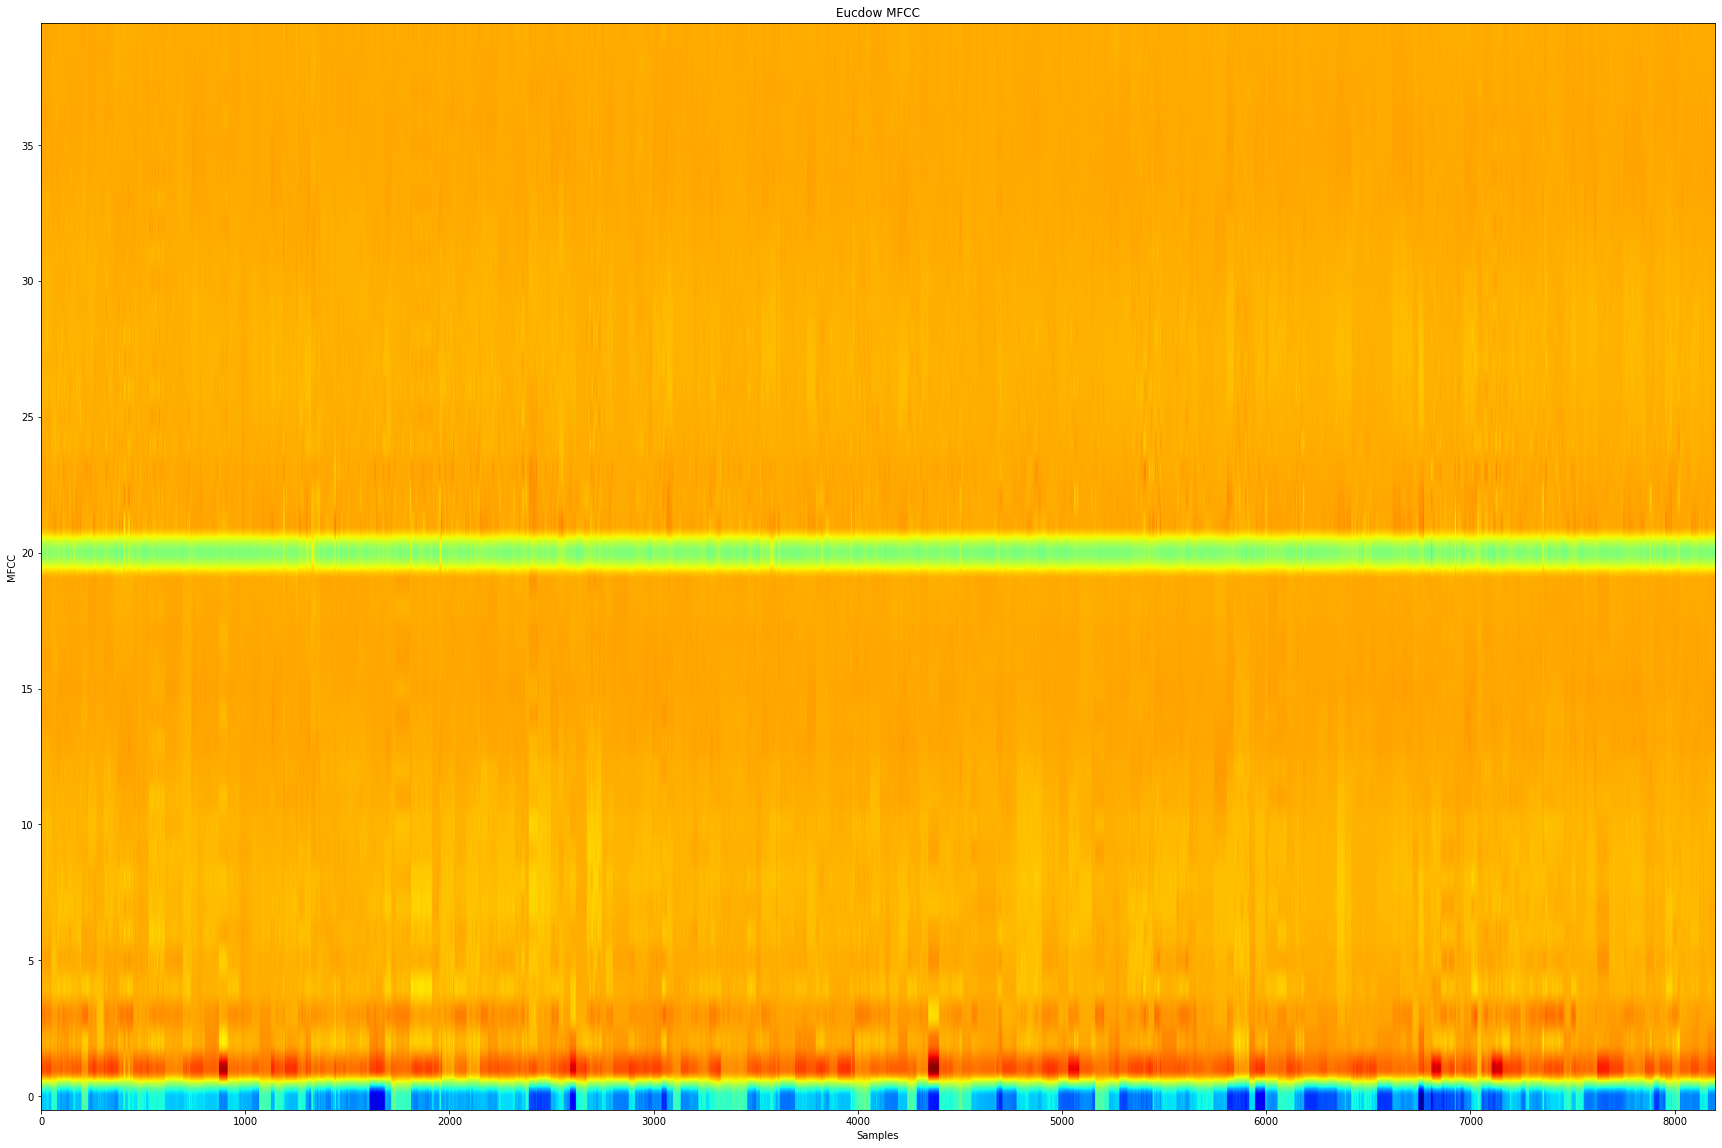

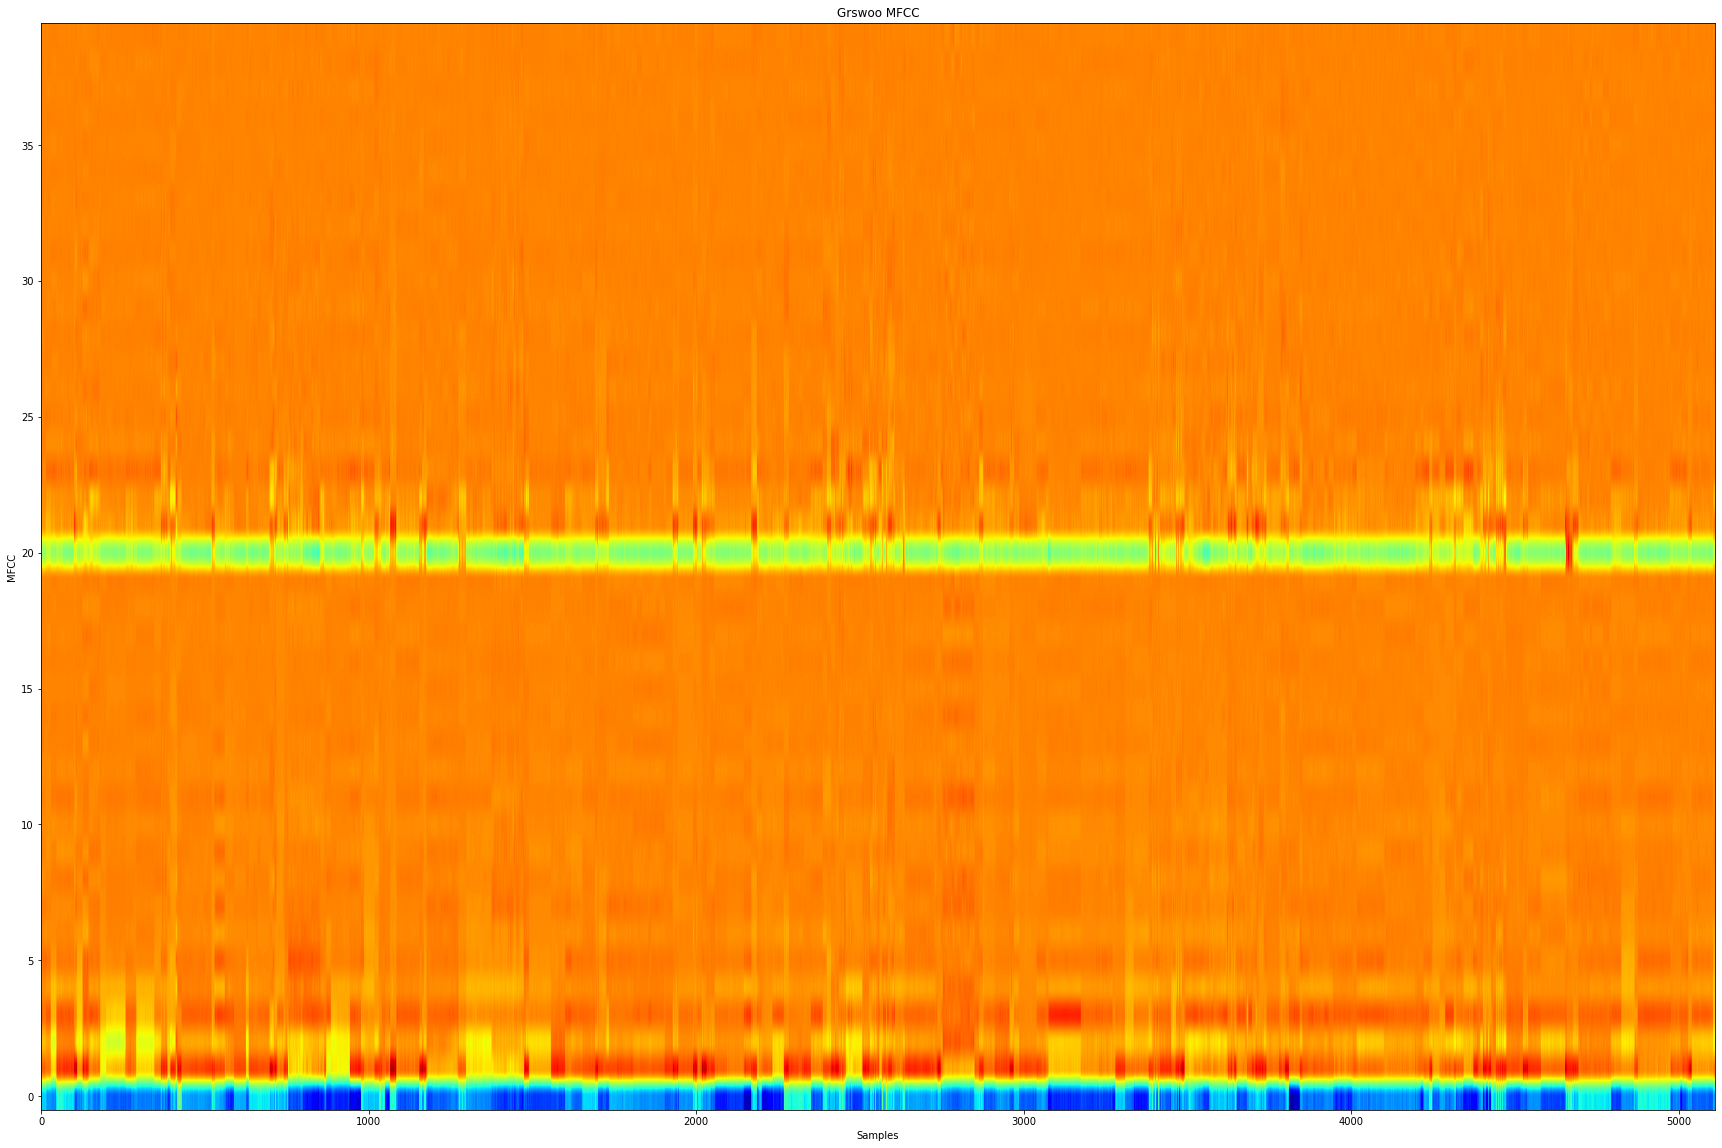

In [69]:
def Plot_MFCC(data,target,cols,title=''):
    filtered_data = data.loc[data['target'] == target]
    data = filtered_data[filtered_data.columns[cols]]
    plt.figure(figsize=(30, 20))
    #plt.subplot(3,1,1)
    plt.imshow(data.T,cmap=plt.cm.jet, aspect='auto',origin='lower')
    plt.ylabel('MFCC')
    plt.xlabel('Samples')
    plt.title(title)

def find_idx_by_string(data:list,string):
    res = []
    for idx,elem in enumerate(data):
        if string in elem:
            res.append(idx)
    return res

Plot_MFCC(full_df,'comcuc',find_idx_by_string(list(full_df.columns),'mfcc_mean'),'Comcuc MFCC')
Plot_MFCC(full_df,'cowpig1',find_idx_by_string(list(full_df.columns),'mfcc_mean'),'Cowpig MFCC')
Plot_MFCC(full_df,'eucdov',find_idx_by_string(list(full_df.columns),'mfcc_mean'),'Eucdow MFCC')
Plot_MFCC(full_df,'grswoo',find_idx_by_string(list(full_df.columns),'mfcc_mean'),'Grswoo MFCC')